# Instagram Visit Dataset

#### Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Import dataset

In [2]:
df =pd.read_csv('Instagram visits clustering.csv')

## EDA

In [3]:
df.head()

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


In [4]:
df.isnull().sum()

User ID                    0
Instagram visit score      0
Spending_rank(0 to 100)    0
dtype: int64

In [5]:
df.columns.tolist()

['User ID', 'Instagram visit score', 'Spending_rank(0 to 100)']

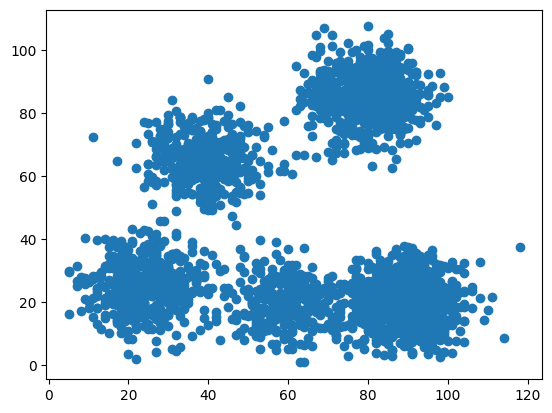

In [6]:
plt.scatter(x='Instagram visit score',y='Spending_rank(0 to 100)',data=df)

# Import KMeans from sklearn

In [7]:
from sklearn.cluster import KMeans

## Applying Elbow Method to find the value of K

In [8]:
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df[['Instagram visit score','Spending_rank(0 to 100)']])
    wcss.append(km.inertia_)

c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anuku\miniconda3\lib\site-packages\sklearn\

In [9]:
wcss

[3985634.779671739,
 2079619.327616434,
 847022.8587952197,
 440248.7915180187,
 278407.5245719686,
 251563.87238921566,
 229709.9520062611,
 208110.33743840503,
 192104.96071652664,
 174787.0490192773]

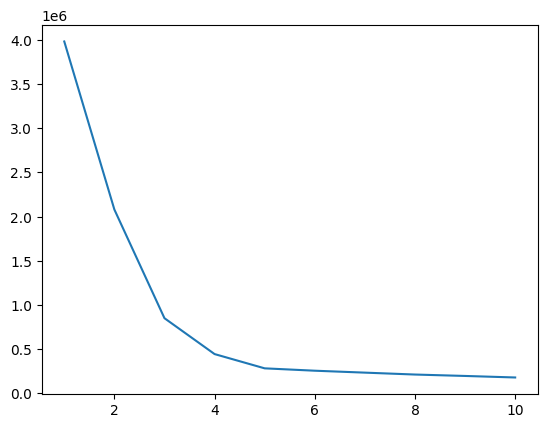

In [10]:
plt.plot(range(1,11),wcss)

- According to above graph we can conclude that the value of K or the number of clusters to be formed are 5.

### making prediction 

In [11]:
km = KMeans(n_clusters=5)
prediction = km.fit_predict(df[['Instagram visit score','Spending_rank(0 to 100)']])

c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
prediction

array([4, 4, 0, ..., 3, 0, 1])

#### find centroid for each cluster

In [13]:
km.cluster_centers_

array([[89.25790139, 19.96346325],
       [39.27135678, 65.26160846],
       [23.954     , 24.9720738 ],
       [79.615     , 85.0244978 ],
       [60.00643087, 19.74246024]])

### store prediction value in a dataframe

In [14]:
df['cluster'] = prediction

In [15]:
df.head()

,User ID,Instagram visit score,Spending_rank(0 to 100),cluster
0,0,63,24.050708,4
1,1,61,25.223290,4
2,2,104,18.528245,0
3,3,82,86.890232,3
4,4,14,31.492397,2


# creating dataframe for each cluster seprately

In [16]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

## plot the graph

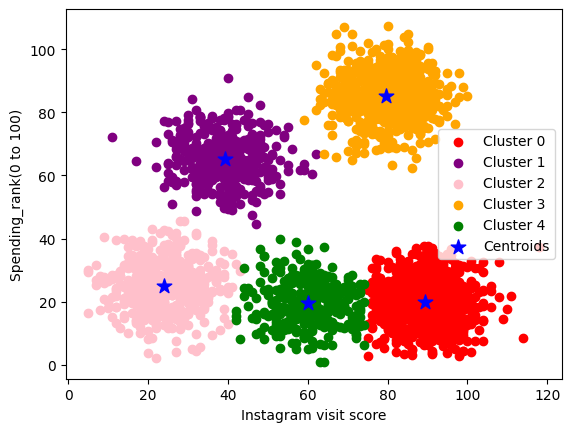

In [17]:
plt.scatter(df1['Instagram visit score'],df1['Spending_rank(0 to 100)'],c='red',label = 'Cluster 0')
plt.scatter(df2['Instagram visit score'],df2['Spending_rank(0 to 100)'],c='purple',label = 'Cluster 1')
plt.scatter(df3['Instagram visit score'],df3['Spending_rank(0 to 100)'],c='pink',label = 'Cluster 2')
plt.scatter(df4['Instagram visit score'],df4['Spending_rank(0 to 100)'],c='orange',label = 'Cluster 3')
plt.scatter(df5['Instagram visit score'],df5['Spending_rank(0 to 100)'],c='green',label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 120, c = 'blue', marker = '*',label = 'Centroids')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank(0 to 100)')
plt.legend()

In [18]:
from sklearn.metrics import accuracy_score,classification_report

In [19]:
print(classification_report(df['cluster'],km.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       1.00      1.00      1.00       398
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       311

    accuracy                           1.00      2600
   macro avg       1.00      1.00      1.00      2600
weighted avg       1.00      1.00      1.00      2600



In [20]:
print(accuracy_score(df['cluster'],km.labels_))

1.0


### NOTE 
- The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 